# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [32]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats

plt.style.use('ggplot')

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [183]:
# Для начала сгенерируем гауссовское распределение:
normal_dist = np.random.normal(1, 4, 500)
stats.describe(normal_dist) # универсальная команда и очень крутая, если честно

DescribeResult(nobs=500, minmax=(-8.7478959428647407, 13.287149143920695), mean=1.1895611412631351, variance=16.470663854047864, skewness=0.15319282866895942, kurtosis=-0.3166634249302991)

In [194]:
# Затем ХИ-Квадрат распределение:
chi_dist = np.random.chisquare(3, 500)
stats.describe(chi_dist)

DescribeResult(nobs=500, minmax=(0.024203061050807644, 13.236374783644516), mean=2.9016879198932002, variance=5.390838315157227, skewness=1.4288773694553991, kurtosis=2.455969857291752)

In [195]:
# Наконец для распределения Пуассона:
pois_dist = np.random.poisson(10, 500)
stats.describe(pois_dist)

DescribeResult(nobs=500, minmax=(2, 24), mean=9.9740000000000002, variance=10.971266533066133, skewness=0.32094194810525767, kurtosis=0.010575060659614444)

**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

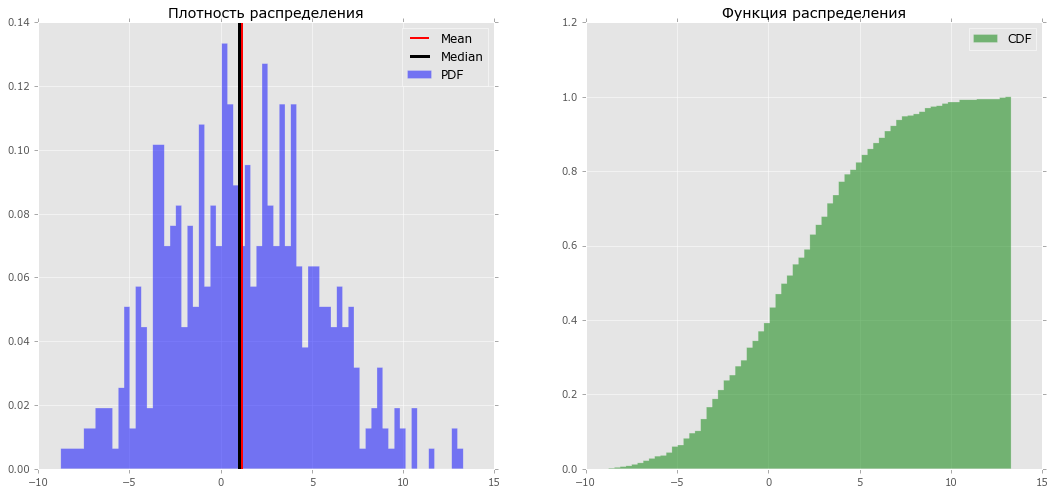

In [192]:
# Итак, сначала построим графики для гауссовского распределения:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,8)
ax1.hist(normal_dist, bins=70, normed=True, histtype='stepfilled', color='blue', alpha=0.5, label='PDF')
ax1.set_title(u'Плотность распределения')
ax2.hist(normal_dist, bins=70, normed=True, histtype='stepfilled', color='green', cumulative=1, alpha=0.5, label='СDF')
ax2.set_title(u'Функция распределения')
mean = np.mean(normal_dist)
median = np.median(normal_dist)
ax1.axvline(mean, color='red', linewidth=2, label='Mean')
ax1.axvline(median, color='black', linewidth=3, label='Median')
ax1.legend()
ax2.legend()
plt.show()

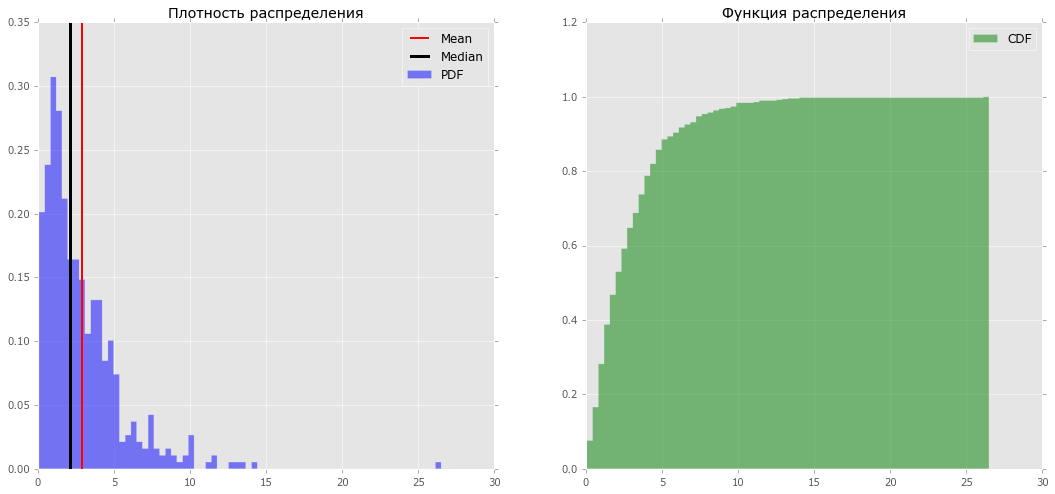

In [193]:
# Далее хи-квадрат:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,8)
ax1.hist(chi_dist, bins=70, normed=True, histtype='stepfilled', color='blue', alpha=0.5, label='PDF')
ax1.set_title(u'Плотность распределения')
ax2.hist(chi_dist, bins=70, normed=True, histtype='stepfilled', color='green', cumulative=1, alpha=0.5, label='СDF')
ax2.set_title(u'Функция распределения')
mean = np.mean(chi_dist)
median = np.median(chi_dist)
ax1.axvline(mean, color='red', linewidth=2, label='Mean')
ax1.axvline(median, color='black', linewidth=3, label='Median')
ax1.legend()
ax2.legend()
plt.show()

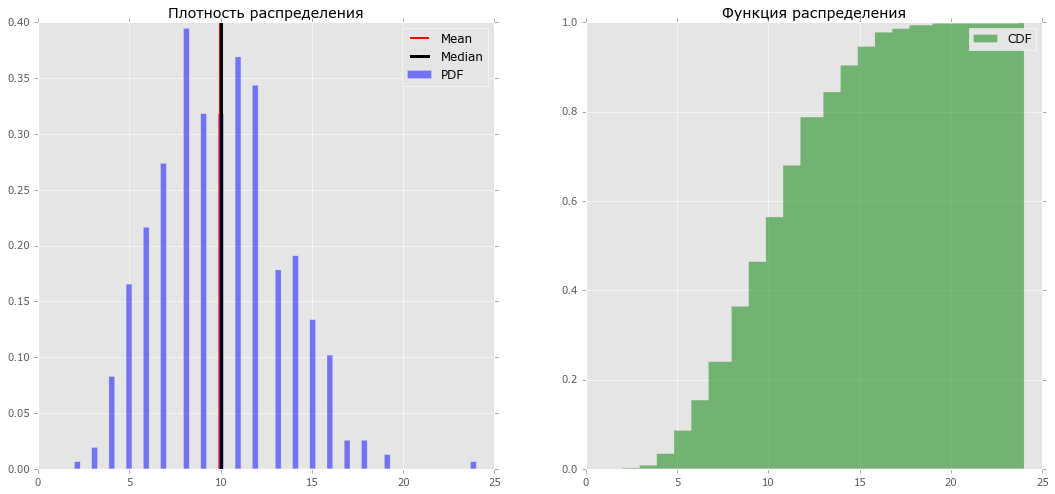

In [196]:
# Наконец для распределения Пуассона:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,8)
ax1.hist(pois_dist, bins=70, normed=True, histtype='stepfilled', color='blue', alpha=0.5, label='PDF')
ax1.set_title(u'Плотность распределения')
ax2.hist(pois_dist, bins=70, normed=True, histtype='stepfilled', color='green', cumulative=1, alpha=0.5, label='СDF')
ax2.set_title(u'Функция распределения')
mean = np.mean(pois_dist)
median = np.median(pois_dist)
ax1.axvline(mean, color='red', linewidth=2, label='Mean')
ax1.axvline(median, color='black', linewidth=3, label='Median')
ax1.legend()
ax2.legend()
plt.show()

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [ ]:
# Не совсем понял, в чем суть этого задания, если в первом просят сделать то же самое??

## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

Коэффициент корелляции Спирмена считает монотонную зависимость между двумя переменными. Под монотонностью здесь понимается совместное изменение этих переменных, но не обязательно с постоянной скоростью.
Коэффициент коррелляции Пирсона считает линейную зависимость между двумя переменными. Линейность предполагает, что с изменением одной переменной, другая будет изменяться с определенным коэффициентом или в определенной пропорции.
Таким образом, разница между этими показателями состоит в том, что коэф-т Спирмена выделяет само направление зависимости двух величин, тогда как коэф-т Пирсона учитывает еще скорость изменения одной величины по отношению к другой.

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [52]:
df = pd.read_csv('../data/beauty.csv', sep=';')

In [7]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [53]:
corr_df = df.corr(method = 'pearson', min_periods=1)
corr_array = np.array(corr_df)
for i in range(len(corr_df.columns)):
    for j in range(len(corr_df.columns)):
        if i==j and corr_array[i][j]==1:
            corr_array[i][j] = 0  # для того, чтобы корреляция переменной с самим собой не учитывалась
        corr_array[i][j]=abs(corr_array[i][j]) # для того, чтобы отрицательная зависимость тоже учитывалась

sort = np.unique(np.sort(corr_array, axis=None))
desc_sort = sort[::-1]
max_values = desc_sort[:3]  # список из трех наибольших значений корреляции

In [61]:
rows = corr_df.index  # список строк
columns = corr_df.columns  # список столбцов
for i in range(len(corr_df.columns)):
    for j in range(len(corr_df.columns)):
        for _ in range(len(max_values)):
            if (i,j)!=(j,i):
                if abs(corr_df.iloc[i][j]) == max_values[_]:
                    print(rows[i], columns[j])

wage female
female wage
female married
married female
service educ
educ service


Итак, мы видим следующий результат: наибольшую линейную зависимость имеют переменные: зарплата и пол, семейное положение и пол, а также занятость в сфере обслуживания и образование. Однако, поскольку мы искали максимальные значения корреляции по модулю, то необходимо взглянуть на эти пары в датафрейме и выяснить направление зависимости, а затем сделать соответствующие выводы.

In [123]:
corr_df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


Итак, как показывают данные, зарплата и пол отрицательно коррелируют. Действительно, это общепринятый факт, что в среднем женщины (значение 1 в строке пол значит женщина) получают меньше мужчин. Далее семейное положение и пол: коррелируют тоже отрицательно. Данный вопрос уже более тонкий, поскольку данную зависимость нужно рассматривать в мировой статистике, но в общем и целом, можно утверждать, что количество незамужних женщин больше, чем мужчин. И последнее: занятость в сфере обслуживания и образование коррелируют положительно. Это не разнится с логикой, ведь, как показывает мировая практика, в сфере предоставления услуг требования к образованию выше, чем, к примеру, в сфере производства.

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

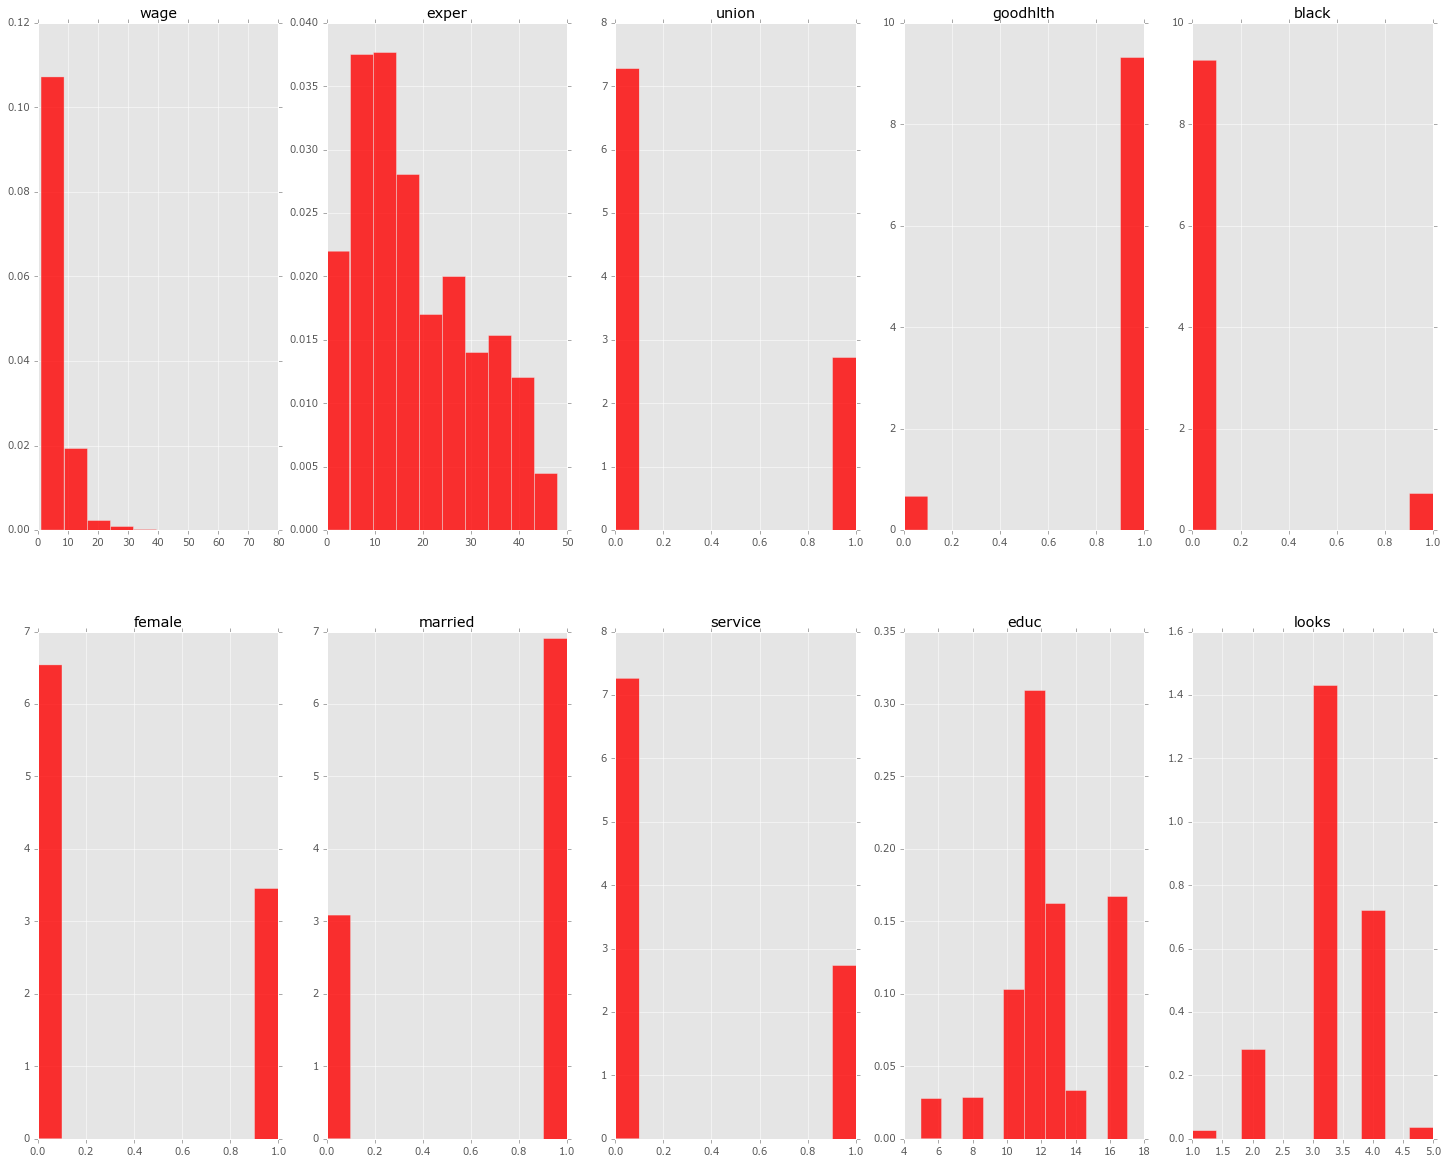

In [147]:
fig, ax = plt.subplots(2,5)
fig.set_size_inches(25,20)

ax[0,0].hist(df['wage'], normed=True, color='r', alpha=0.8)
ax[0,0].set_title('wage')
ax[0,1].hist(df['exper'], normed=True, color='r', alpha=0.8)
ax[0,1].set_title('exper')
ax[0,2].hist(df['union'], normed=True, color='r', alpha=0.8)
ax[0,2].set_title('union')
ax[0,3].hist(df['goodhlth'], normed=True, color='r', alpha=0.8)
ax[0,3].set_title('goodhlth')
ax[0,4].hist(df['black'], normed=True, color='r', alpha=0.8)
ax[0,4].set_title('black')
ax[1,0].hist(df['female'], normed=True, color='r', alpha=0.8)
ax[1,0].set_title('female')
ax[1,1].hist(df['married'], normed=True, color='r', alpha=0.8)
ax[1,1].set_title('married')
ax[1,2].hist(df['service'], normed=True, color='r', alpha=0.8)
ax[1,2].set_title('service')
ax[1,3].hist(df['educ'], normed=True, color='r', alpha=0.8)
ax[1,3].set_title('educ')
ax[1,4].hist(df['looks'], normed=True, color='r', alpha=0.8)
ax[1,4].set_title('looks')

Очевидно, что для бинарных показателей никакого смысла строить выборки и делать предположения о распределении нет смысла, поэтому будем анализировать первые две и последние две гистограммы.
Итак, 
1-ая гистограмма похожа экспоненциальное распределение,
2-ая на хи-квадрат распределение,
9-ая и 10-ая из-за малого количества различных значений особо не выделяются, но признаки нормального просматриваются.

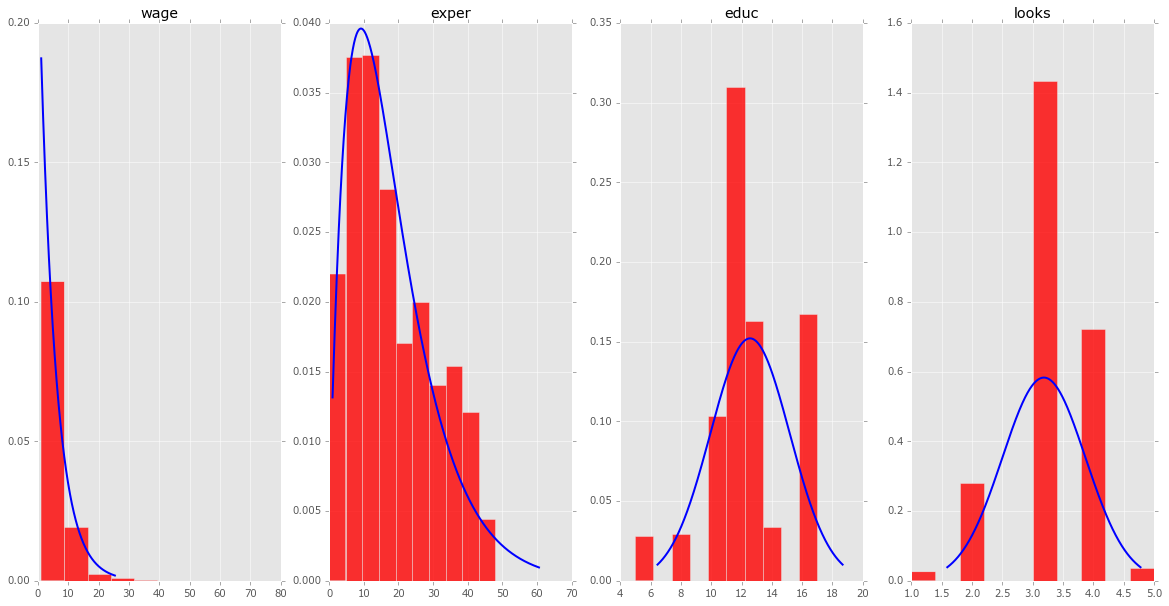

In [174]:
# Исследуем первую гистограмму (экспон-ое)
a1 = stats.expon.fit(df['wage'])  # находим основные параметры для распределения похожего на хи-квадрат
b1 = np.linspace(stats.expon.ppf(0.01, a1[0], a1[1]), stats.expon.ppf(0.99, a1[0], a1[1]), 500) # ген-ия знач-ий
# Вторая гистограмма (хи-квадрат)
a2 = stats.chi2.fit(df['exper'])  
b2 = np.linspace(stats.chi2.ppf(0.01, a2[0], a2[1], a2[2]), stats.chi2.ppf(0.99, a2[0], a2[1], a2[2]), 500)
# Девятая гистограмма (норм-ое)
a3 = stats.norm.fit(df['educ'])  
b3 = np.linspace(stats.norm.ppf(0.01, a3[0], a3[1]), stats.norm.ppf(0.99, a3[0], a3[1]), 500)
# Десятая гистограмма (норм-ое)
a4 = stats.norm.fit(df['looks'])  
b4 = np.linspace(stats.norm.ppf(0.01, a4[0], a4[1]), stats.norm.ppf(0.99, a4[0], a4[1]), 500)
fig, ax = plt.subplots(1,4)
fig.set_size_inches(20,10)

ax[0].hist(df['wage'], normed=True, color='r', alpha=0.8)
ax[0].plot(b1, stats.expon.pdf(b1, a1[0], a1[1]),'b-', lw=2)
ax[0].set_title('wage')

ax[1].hist(df['exper'], normed=True, color='r', alpha=0.8)
ax[1].plot(b2, stats.chi2.pdf(b2, a2[0], a2[1], a2[2]),'b-', lw=2)
ax[1].set_title('exper')

ax[2].hist(df['educ'], normed=True, color='r', alpha=0.8)
ax[2].plot(b3, stats.norm.pdf(b3, a3[0], a3[1]),'b-', lw=2)
ax[2].set_title('educ')

ax[3].hist(df['looks'], normed=True, color='r', alpha=0.8)
ax[3].plot(b4, stats.norm.pdf(b4, a4[0], a4[1]),'b-', lw=2)
ax[3].set_title('looks')

In [153]:
a1 = stats.expon.fit(df['wage'])
a1

(1.0199999996628959, 5.2866893329296314)

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [ ]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# Для начала загрузим из базы все данные, относящиеся к выбранным категориям
categories = ['sci.electronics', 'rec.autos']
total_news = fetch_20newsgroups(subset='all', categories=categories)

In [11]:
text_all = total_news.data  # все данные текста, т.е. сам текст
text_train, text_test, y_train, y_test = train_test_split(total_news.data, total_news.target, test_size = 0.3) # тексты-выборки

In [21]:
print("\n".join(text_train[0].split("\n")[:10]))
print('target name - ', total_news.target_names[y_train[0]])
# Эти манипуляции для того, чтобы разобраться в функциях данных пакетов. Итак, мы поняли, что каждый топик имеет свой
# порядковый номер, итерируясь по которым через y_train[i] можно получить тему, категорию самого топика

From: guo@acuson.com (Xiaocong Guo)
Subject: Re: Toyota Land Cruiser worth it?
Organization: Acuson; Mountain View, California
Lines: 26

tvervaek@col.hp.com (Tom Vervaeke) writes:

>My wife and I looked at, and drove one last fall. This was a 1992 model.
>It was WAYYYYYYYYY underpowered. I could not imagine driving it in the
>mountains here in Colorado at anything approaching highway speeds. I
target name -  rec.autos 



**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [27]:
count_vector = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
count_vector.fit(total_news)
X_train = count_vector.transform(text_train).toarray()  # преобразуем в вектора наши данные по text_train
X_test = count_vector.transform(text_test).toarray()   # то же самое с text_test

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [35]:
quantity_df=pd.DataFrame({'Quantity of word':np.sum(X_train, axis=0), 'The word':count_vector.get_feature_names()})
quantity_df.sort_values(by='Quantity of word', ascending=False)[:50]
# Больше значений не выдает, видимо, потому что повторяющихся слов больше нет :(

,Quantity of word,The word
0,127,data
2,11,description
4,7,target
1,0,descr
3,0,filenames
5,0,target_names


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток.

In [43]:
class_learn = MultinomialNB(alpha=1.0).fit(X_train, y_train)   # научили
prediction = class_learn.predict(X_test)   # предсказали
probas = class_learn.predict_proba(X_test)  # вероятности предугадывания

print('precision = ', np.mean(prediction==y_test))  # точность
print('prediction probabilities = ', probas)

precision =  0.504215851602
prediction probabilities =  [[ 0.51049964  0.48950036]
 [ 0.51049964  0.48950036]
 [ 0.51049964  0.48950036]
 ..., 
 [ 0.51049964  0.48950036]
 [ 0.51049964  0.48950036]
 [ 0.51049964  0.48950036]]


In [44]:
# Можно более наглядно вывести основные показатели предикции по каждой из выбранных категорий
from sklearn import metrics
print(metrics.classification_report(y_test, prediction, target_names=total_news.target_names))

                 precision    recall  f1-score   support

      rec.autos       0.49      0.97      0.65       285
sci.electronics       0.72      0.07      0.14       308

    avg / total       0.61      0.50      0.38       593



**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [50]:
class_learn2 = MultinomialNB(alpha=0.0).fit(X_train, y_train)
prediction2 = class_learn2.predict(X_test)
probas2 = class_learn2.predict_proba(X_test)

print('precision = ', np.mean(prediction2==y_test))
print('prediction probabilities = ', probas2)

precision =  0.480607082631
prediction probabilities =  [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction2, target_names=total_news.target_names))

                 precision    recall  f1-score   support

      rec.autos       0.48      1.00      0.65       285
sci.electronics       0.00      0.00      0.00       308

    avg / total       0.23      0.48      0.31       593



C:\Users\Vlad\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Попробуем разобраться в результате. Принцип Наивного Байеса базируется на предположении, что все СВ или испытания независимы. Далее, видим, что мы, по сути, ищем вероятность для события "встретить 0 выбранных слов в нашей выборке", которая, очевидно, равняется нулю. По формуле Байеса выходит, что вся вероятность данного события равняется нулю. Иными словами, в большой базе данных вероятность не встретить слова и не принадлежать какой-либо категории равно нулю. Но логично предположить, что в прицнипе такое возможно: или слово очень редкое, или категория не обширна по лексике (тот же спорт). Получаем, что все-таки мы недооцениваем вероятность встретить слова, не входящие в выбранную базу. Это и есть смысл полученного результата.